In [137]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [138]:
titanic_data = pd.read_csv('train.csv')

In [139]:
titanic_data.head() # Просматриваем таблицу

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
titanic_data.isnull().sum() # Количество пропущенных значений

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [141]:
# Видим, что у нас меньше всего информации о каюте и возрасте пассажиров. Давайте предположим, что
# выжил или не выжил пассажир не зависит от каюты. 
# Что делать с пустыми значениями возраста? Что будет являться рациональным решением?

In [142]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin',], axis=1)
Y = titanic_data.Survived

In [143]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [144]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [145]:
X = pd.get_dummies(X)

In [146]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [147]:
X.Age.median()
# для пассажиров мужского пола использовать медианный возраст мужчин, для женщин - еженщин

28.0

In [148]:
#X = X.fillna(0) - заполнит все значение нулями
X = X.fillna({'Age': X.Age.median()})

In [149]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [150]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [151]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [152]:
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

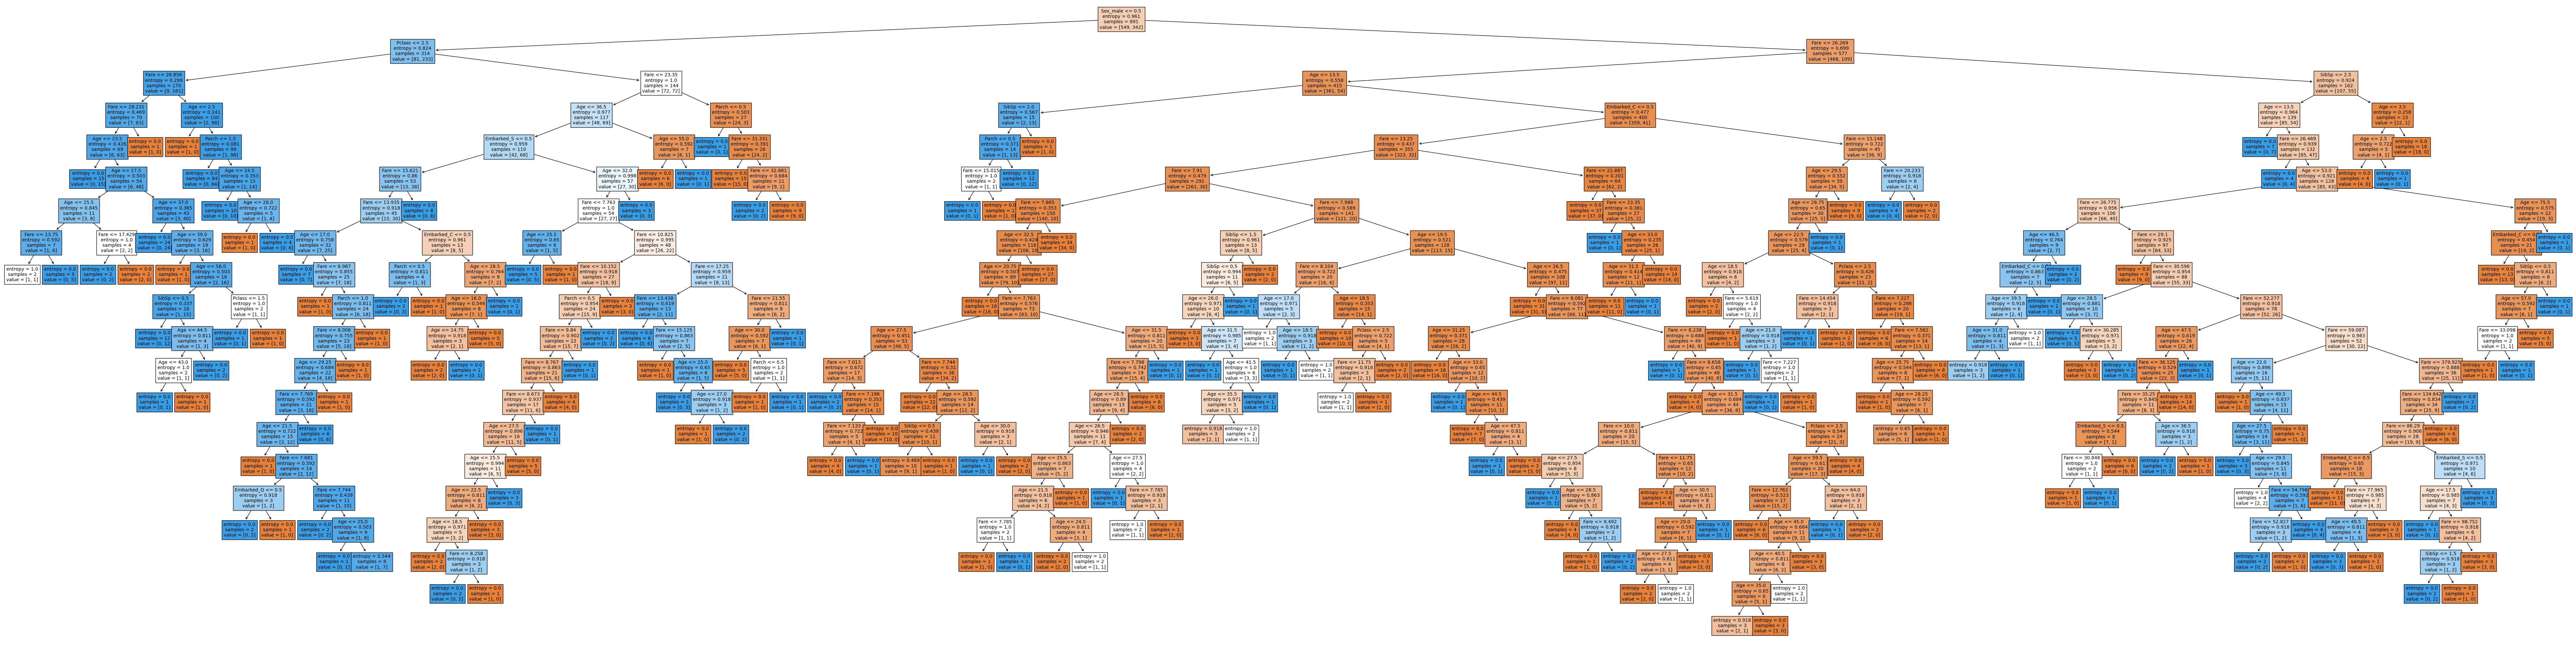

In [153]:
plt.figure(figsize=(100, 25))
tree.plot_tree(
    clf.fit(X, Y),
    fontsize=10, feature_names=list(X), filled=True
)
plt.show()

In [154]:
'''
Есть две идеи - ограничивать глубину дерева
Вторая идея - показывать дереву 2 набора данны (обучение + тестирование)
'''

'\nЕсть две идеи - ограничивать глубину дерева\nВторая идея - показывать дереву 2 набора данны (обучение + тестирование)\n'

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [157]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [158]:
clf.score(X_train, y_train)

0.9798657718120806

In [159]:
clf.score(X_test, y_test)

0.7661016949152543

In [160]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [161]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [162]:
clf.score(X_train, y_train)

0.8406040268456376

In [163]:
clf.score(X_test, y_test)

0.8067796610169492

In [164]:
# Вместо последнего слайда в презентации.

In [165]:
max_depth_values=range(1, 100) # Глубина дерева от 1 до 100

In [166]:
scores_data = pd.DataFrame()

In [167]:
for max_depth in max_depth_values: # Для каждой глубины от 1 до 99
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth) # Создаем дерево с глубиной
    clf.fit(X_train, y_train) # Обучаем на тренировочной выборке
    train_score = clf.score(X_train, y_train) # Смотрим результат по тренировочной выборке
    test_score = clf.score(X_test, y_test) # Смотрим результат на тестовой (неизвестной) выборке
    temp_score_data = pd.DataFrame({ 
        'max_depth':[max_depth],
        'train_score': [train_score],
        'test_score': [test_score],
    })
    scores_data = pd.concat([scores_data, temp_score_data])

In [168]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [169]:
scores_data_long = pd.melt(
    scores_data, id_vars=['max_depth'],
    value_vars=['train_score', 'test_score'],
    var_name='set_type',
    value_name='score')

In [170]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot: xlabel='max_depth', ylabel='score'>

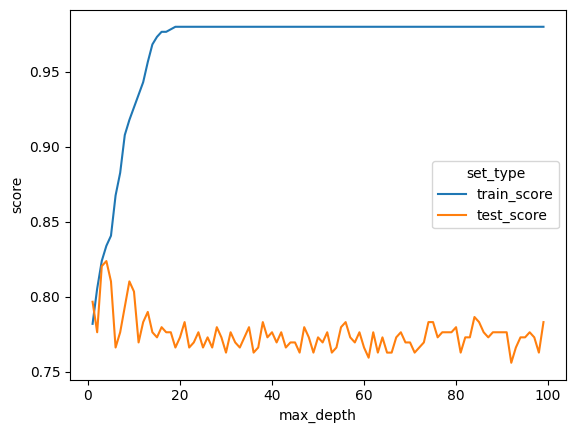

In [171]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)